# Equitable Taxation Model

This dataset was chosen as it provided insights into the incomes and expenditures of a population, which could pave the way towards designing a more equitable taxation system based on data analytics.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from math import sin, cos, sqrt, atan2, radians, pi

In [13]:
data = pd.read_csv('Filipino Family Income and Expenditure.csv')

## 1. Data Exploration

In [14]:
data.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

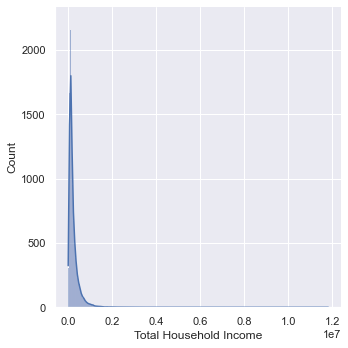

In [16]:
sns.displot(data=data, x='Total Household Income', kde=True)

C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


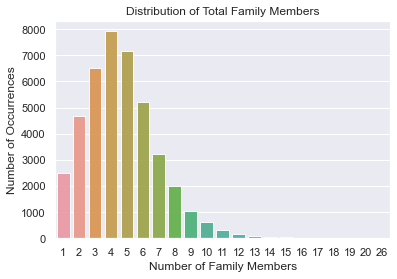

In [17]:
%matplotlib inline
occupation_count = data['Total Number of Family members'].value_counts()
sns.set(style="darkgrid")
sns.barplot(occupation_count.index, occupation_count.values, alpha=0.9)
plt.title('Distribution of Total Family Members')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Family Members', fontsize=12)
plt.show()

C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


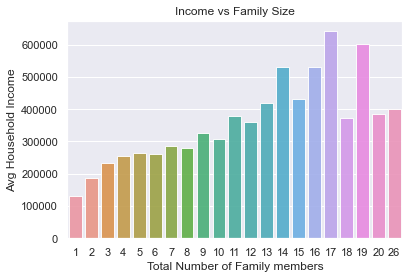

In [18]:
income_avg = data.groupby(['Total Number of Family members'], as_index=True)['Total Household Income'].mean()
sns.barplot(income_avg.index, income_avg.values, alpha=0.9)
plt.title('Income vs Family Size')
plt.ylabel('Avg Household Income', fontsize=12)
plt.xlabel('Total Number of Family members', fontsize=12)
plt.show()

Figure 1: There is significant income disparity in the Philippines.

Figure 2: Most of the families have less than 7 members.

Figure 3: Income does increase somewhat linearly with number of family members. However, the increase is not proportional. Particularly in the family size of 4-6, the average income is almost the same. In some cases, families with more members make even less income. This shows that though they may have more mouths to feed, some families do not make much more money to offset the cost. However, they will be taxed the same amount as those in smaller families. This is where we seek to make taxation more equitable.

## 2. Data Preprocessing

Removing special characters from column names.

In [19]:
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace(',', '')
data.columns = data.columns.str.replace('/', '')
data.columns = data.columns.str.replace('-', '')

Remove households that earn less than the minimum taxable income of PHP 250,000.

In [20]:
data = data[data['TotalHouseholdIncome']>=250000]

In [21]:
data.shape

(12807, 60)

Finding and imputing missing values.

In [22]:
data.isnull().sum()

TotalHouseholdIncome                           0
Region                                         0
TotalFoodExpenditure                           0
MainSourceofIncome                             0
AgriculturalHouseholdindicator                 0
BreadandCerealsExpenditure                     0
TotalRiceExpenditure                           0
MeatExpenditure                                0
TotalFishandmarineproductsExpenditure          0
FruitExpenditure                               0
VegetablesExpenditure                          0
RestaurantandhotelsExpenditure                 0
AlcoholicBeveragesExpenditure                  0
TobaccoExpenditure                             0
ClothingFootwearandOtherWearExpenditure        0
HousingandwaterExpenditure                     0
ImputedHouseRentalValue                        0
MedicalCareExpenditure                         0
TransportationExpenditure                      0
CommunicationExpenditure                       0
EducationExpenditure

In [23]:
data[data['HouseholdHeadClassofWorker'].isnull()]['HouseholdHeadJoborBusinessIndicator']

50       No Job/Business
60       No Job/Business
63       No Job/Business
89       No Job/Business
103      No Job/Business
              ...       
41425    No Job/Business
41486    No Job/Business
41500    No Job/Business
41505    No Job/Business
41520    No Job/Business
Name: HouseholdHeadJoborBusinessIndicator, Length: 3114, dtype: object

In [24]:
data['HouseholdHeadJoborBusinessIndicator'].value_counts()

With Job/Business    9693
No Job/Business      3114
Name: HouseholdHeadJoborBusinessIndicator, dtype: int64

In [25]:
# When trying to impute from adjacent values, it was discovered that the missing values are for families where the household head is unemployed. 
# Therefore the missing values are replaced as such.

data['HouseholdHeadClassofWorker'].fillna('Unemployed', inplace=True)
data['HouseholdHeadOccupation'].fillna('Unemployed', inplace=True)

In [26]:
data.isnull().sum()

TotalHouseholdIncome                        0
Region                                      0
TotalFoodExpenditure                        0
MainSourceofIncome                          0
AgriculturalHouseholdindicator              0
BreadandCerealsExpenditure                  0
TotalRiceExpenditure                        0
MeatExpenditure                             0
TotalFishandmarineproductsExpenditure       0
FruitExpenditure                            0
VegetablesExpenditure                       0
RestaurantandhotelsExpenditure              0
AlcoholicBeveragesExpenditure               0
TobaccoExpenditure                          0
ClothingFootwearandOtherWearExpenditure     0
HousingandwaterExpenditure                  0
ImputedHouseRentalValue                     0
MedicalCareExpenditure                      0
TransportationExpenditure                   0
CommunicationExpenditure                    0
EducationExpenditure                        0
MiscellaneousGoodsandServicesExpen

## 3. Variable Identification

There are several features describing the spending habits of each household.

In [27]:
expenselist = []
for i in data.columns:
    if 'Expenditure' in i:
        expenselist.append(i)
expenselist

['TotalFoodExpenditure',
 'BreadandCerealsExpenditure',
 'TotalRiceExpenditure',
 'MeatExpenditure',
 'TotalFishandmarineproductsExpenditure',
 'FruitExpenditure',
 'VegetablesExpenditure',
 'RestaurantandhotelsExpenditure',
 'AlcoholicBeveragesExpenditure',
 'TobaccoExpenditure',
 'ClothingFootwearandOtherWearExpenditure',
 'HousingandwaterExpenditure',
 'MedicalCareExpenditure',
 'TransportationExpenditure',
 'CommunicationExpenditure',
 'EducationExpenditure',
 'MiscellaneousGoodsandServicesExpenditure',
 'SpecialOccasionsExpenditure']

We can further analyse this to understand how much of the spending is essential and how much is on luxuries. This could offer a useful discriminating factor for us to adjust taxation.

We will predict the expenditure values (dependent variables) based on the other non-expense related features (independent variables). The most obvious methodology to attempt would be a multivariate analysis due to the number of features available.

Continuous variables make good candidates for independent variables. However, there are a lot of categorical variables in the dataset which need to be encoded.

In [28]:
obj_df = data.select_dtypes(include=['object']).copy()
for item in obj_df.columns:
    obj_df[item] = obj_df[item].astype('category')
    obj_df[item] = obj_df[item].cat.codes
    
for item in data.columns:
    if item in obj_df.columns:
        data[item] = obj_df[item]

## 4. Feature Selection

There are a total of 60 features, many of which seem to be redundant.

Expenditure can be consolidated into essentials and non-essentials.

In [29]:
data['TotalNecessaryExpenditure'] = data['BreadandCerealsExpenditure'] + data['TotalRiceExpenditure'] + data['MeatExpenditure'] + data['TotalFishandmarineproductsExpenditure'] + data['FruitExpenditure'] + data['VegetablesExpenditure'] + data['MedicalCareExpenditure']

In [30]:
data['TotalUnnecessaryExpenditure'] = data['RestaurantandhotelsExpenditure'] + data['AlcoholicBeveragesExpenditure'] + data['TobaccoExpenditure'] + data['ClothingFootwearandOtherWearExpenditure'] + data['CommunicationExpenditure'] + data['MiscellaneousGoodsandServicesExpenditure'] + data['TransportationExpenditure'] + data['SpecialOccasionsExpenditure']

Note that some features have been excluded from this as they are redundant or ambiguous. Ambiguous in this context means that they are likely to contain both scenarios of necessity and luxury.

-- 'Total Food Expenditure' will be covered when adding up the spending on individual food items.

-- 'Housing and Water Expenditure' is ambiguous. It could include rent for a small apartment as well as the mortgage for a luxury condo. 

-- 'Education Expenditure' should be encouraged, but there could also be people who splurge on expensive private schools or overseas education.

-- 'Crop Farming and Gardening Expenses' may not apply to enough people above the minimum taxable income bracket to prove meaningful.

We also do not need so much granularity on the number of appliances owned. These can be combined under one feature.

In [31]:
data['TotalMovableAssets'] = data['NumberofTelevision'] + data['NumberofCDVCDDVD'] + data['NumberofComponentStereoset'] + data['NumberofRefrigeratorFreezer'] + data['NumberofWashingMachine'] + data['NumberofAirconditioner'] + data['NumberofCarJeepVan'] + data['NumberofLandlinewirelesstelephones'] + data['NumberofCellularphone'] + data['NumberofPersonalComputer'] + data['NumberofStovewithOvenGasRange'] + data['NumberofMotorizedBanca'] + data['NumberofMotorcycleTricycle']

## 5. Feature Engineering

There is information that can be gleaned from manipulating the existing features. These would be more valuable for modelling than the individual features themselves.
We will create new features that relate to the expenses and quality of life of each household.

In [32]:
data['Dependants'] = data['TotalNumberofFamilymembers']-data['Totalnumberoffamilymembersemployed']
data['HouseSpacePerPerson'] = data['HouseFloorArea']/data['TotalNumberofFamilymembers']
data['MovableAssetsPerPerson'] = data['TotalMovableAssets']/data['TotalNumberofFamilymembers']

Create new column for the current taxes paid by each household, based on personal income tax quantums in the Philippines.

In [33]:
data['CurrentTaxPaid'] = 0

for i,row in data.iterrows():
    if row['TotalHouseholdIncome'] < 400000:
        data.loc[i,'CurrentTaxPaid'] = 0.2 * (row['TotalHouseholdIncome']-250000)
    elif row['TotalHouseholdIncome'] >= 400000 and row['TotalHouseholdIncome'] < 800000:
        data.loc[i,'CurrentTaxPaid'] = 30000 + 0.25 * (row['TotalHouseholdIncome']-400000)
    elif row['TotalHouseholdIncome'] >= 800000 and row['TotalHouseholdIncome'] < 2000000:
        data.loc[i,'CurrentTaxPaid'] = 130000 + 0.3 * (row['TotalHouseholdIncome']-800000)
    elif row['TotalHouseholdIncome'] >= 2000000 and row['TotalHouseholdIncome'] < 8000000:
        data.loc[i,'CurrentTaxPaid'] = 490000 + 0.32 * (row['TotalHouseholdIncome']-2000000)
    elif row['TotalHouseholdIncome'] >= 8000000:
        data.loc[i,'CurrentTaxPaid'] = 2410000 + 0.35 * (row['TotalHouseholdIncome']-8000000)

Extract the relevant consolidated independent and dependent variables into a new dataframe.

In [22]:
mydata = data[['TotalHouseholdIncome','Region','MainSourceofIncome','AgriculturalHouseholdindicator','ImputedHouseRentalValue','HouseholdHeadSex','HouseholdHeadAge','HouseholdHeadMaritalStatus','HouseholdHeadHighestGradeCompleted','HouseholdHeadJoborBusinessIndicator', 'HouseholdHeadOccupation','HouseholdHeadClassofWorker', 'TypeofHousehold','Electricity','MainSourceofWaterSupply','Dependants','HouseSpacePerPerson','MovableAssetsPerPerson','TotalNecessaryExpenditure','TotalUnnecessaryExpenditure','CurrentTaxPaid']]

In [23]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12807 entries, 0 to 41532
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   TotalHouseholdIncome                 12807 non-null  int64  
 1   Region                               12807 non-null  int8   
 2   MainSourceofIncome                   12807 non-null  int8   
 3   AgriculturalHouseholdindicator       12807 non-null  int64  
 4   ImputedHouseRentalValue              12807 non-null  int64  
 5   HouseholdHeadSex                     12807 non-null  int8   
 6   HouseholdHeadAge                     12807 non-null  int64  
 7   HouseholdHeadMaritalStatus           12807 non-null  int8   
 8   HouseholdHeadHighestGradeCompleted   12807 non-null  int8   
 9   HouseholdHeadJoborBusinessIndicator  12807 non-null  int8   
 10  HouseholdHeadOccupation              12807 non-null  int16  
 11  HouseholdHeadClassofWorker  

We are left with a much more focused and relevant set of features on which to build our model.

## 6. Outlier Management

<AxesSubplot:>

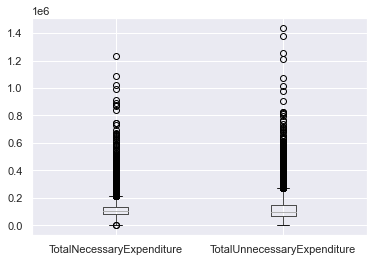

In [24]:
mydata.boxplot(column=['TotalNecessaryExpenditure','TotalUnnecessaryExpenditure'])

As shown, there are significant outliers in the expenditure data. This is from a small handful of households which spend abnormally high amounts. This would be misrepresentative of the majority who may be relatively frugal. If we do not remove these outliers, our model would be biased towards predicting higher values for expenditure.

In [25]:
# Remove rows where the zscore for expenditure columns is beyond a threshold value.

scores = scipy.stats.zscore(mydata[['TotalNecessaryExpenditure','TotalUnnecessaryExpenditure']])
scores = np.abs(scores)
filterer = (scores < 1.25).all(axis=1)
mydata = mydata[filterer]
mydata.shape

(10869, 21)

<AxesSubplot:>

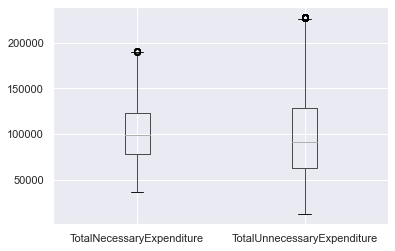

In [26]:
mydata.boxplot(column=['TotalNecessaryExpenditure','TotalUnnecessaryExpenditure'])

As observed, with a zscore threshold of 1.25, most of the outliers have been eliminated. The number of datapoints has decreased only slightly and the size of remaining dataset is still large. This dataset will provide a more accurate model for prediction.

## 7. Data Modelling

Split the data into training and test sets. Then perform predictions for 2 separate dependent variables: 'Predicted Necessary Expenditure' and 'Predicted Unnecessary Expenditure'.

In [27]:
rng = np.random.RandomState(42)

mydata_train, mydata_test = train_test_split(mydata, test_size=0.20, random_state=rng)

In [28]:
X_train = mydata_train.drop(['TotalNecessaryExpenditure','TotalUnnecessaryExpenditure','CurrentTaxPaid'], axis=1)
X_test = mydata_test.drop(['TotalNecessaryExpenditure','TotalUnnecessaryExpenditure','CurrentTaxPaid'], axis=1)
y_train1 = mydata_train['TotalNecessaryExpenditure']
y_train2 = mydata_train['TotalUnnecessaryExpenditure']
y_test1 = mydata_test['TotalNecessaryExpenditure']
y_test2 = mydata_test['TotalUnnecessaryExpenditure']

### -- Multiple Linear Regression

In [29]:
mlr = LinearRegression()
mlr.fit(X_train,y_train1)
print(f'R-Score: {mlr.score(X_train,y_train1)}')

R-Score: 0.23212234271271737


### -- Ridge Regression

In [30]:
rm = Ridge(alpha=0.1)
rm.fit(X_train,y_train1)
print(f'R-Score: {rm.score(X_train,y_train1)}')

R-Score: 0.23212233931610804


### -- Ridge Regression with Polynomial Regression

In [31]:
pr=PolynomialFeatures(degree=2, include_bias=False)
x_train_pr = pr.fit_transform(X_train)
rmpr = Ridge(alpha=0.1)
rmpr.fit(x_train_pr,y_train1)
print(f'R-Score: {rmpr.score(x_train_pr,y_train1)}')

R-Score: 0.28310214211225193


C:\Users\rames\anaconda3\envs\nus\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.68846e-29): result may not be accurate.
  overwrite_a=True).T


### -- Multiple Linear Regression with OLS

In [32]:
mlrols = sm.OLS(y_train1, X_train).fit()
mlrols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     TotalNecessaryExpenditure   R-squared (uncentered):                   0.928
Model:                                   OLS   Adj. R-squared (uncentered):              0.928
Method:                        Least Squares   F-statistic:                              6212.
Date:                       Sat, 17 Apr 2021   Prob (F-statistic):                        0.00
Time:                               16:45:31   Log-Likelihood:                     -1.0159e+05
No. Observations:                       8695   AIC:                                  2.032e+05
Df Residuals:                           8677   BIC:                                  2.033e+05
Df Model:                                 18                                                  
Covariance Type:                   nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
TotalHouseholdIncome                    0.0347      0.002     22.462      0.000       0.032       0.038
Region                                397.4539     76.121      5.221      0.000     248.239     546.669
MainSourceofIncome                   2994.1567    451.787      6.627      0.000    2108.546    3879.767
AgriculturalHouseholdindicator      -2569.1047    404.338     -6.354      0.000   -3361.703   -1776.507
ImputedHouseRentalValue                -0.0123      0.008     -1.506      0.132      -0.028       0.004
HouseholdHeadSex                     3828.2614    846.250      4.524      0.000    2169.410    5487.113
HouseholdHeadAge                      325.6251     27.044     12.041      0.000     272.612     378.638
HouseholdHeadMaritalStatus           -215.6973    483.008     -0.447      0.655   -1162.507     731.113
HouseholdHeadHighestGradeCompleted     66.3931     23.857      2.783      0.005      19.627     113.159
HouseholdHeadJoborBusinessIndicator  3619.6134   1006.568      3.596      0.000    1646.502    5592.725
HouseholdHeadOccupation                10.7605      3.789      2.840      0.005       3.334      18.187
HouseholdHeadClassofWorker           1126.1566    240.945      4.674      0.000     653.847    1598.466
TypeofHousehold                     -2335.4403    670.308     -3.484      0.000   -3649.402   -1021.478
Electricity                          3.109e+04   2269.383     13.700      0.000    2.66e+04    3.55e+04
MainSourceofWaterSupply              -158.2631    167.830     -0.943      0.346    -487.250     170.724
Dependants                           6633.5249    182.664     36.316      0.000    6275.461    6991.589
HouseSpacePerPerson                   -58.7094     15.076     -3.894      0.000     -88.263     -29.156
MovableAssetsPerPerson                631.0378    284.931      2.215      0.027      72.505    1189.570
==============================================================================
Omnibus:                      292.989   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.341
Skew:                           0.425   Prob(JB):                     5.59e-74
Kurtosis:                       3.456   Cond. No.                     3.70e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.7e+06. This might

### -- Pipeline with Multiple Linear Regression

In [33]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X_train,y_train1)
print(f'R-Score: {pipe.score(X_train,y_train1)}')

R-Score: 0.28310219160975114


### Multiple Linear Regression with OLS far outperforms the other models.

In [34]:
# For necessary expenditure prediction

mymodel_mlr1 = sm.OLS(y_train1, X_train).fit()
predictions1 = mymodel_mlr1.predict(X_test)
mymodel_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     TotalNecessaryExpenditure   R-squared (uncentered):                   0.928
Model:                                   OLS   Adj. R-squared (uncentered):              0.928
Method:                        Least Squares   F-statistic:                              6212.
Date:                       Sat, 17 Apr 2021   Prob (F-statistic):                        0.00
Time:                               16:45:34   Log-Likelihood:                     -1.0159e+05
No. Observations:                       8695   AIC:                                  2.032e+05
Df Residuals:                           8677   BIC:                                  2.033e+05
Df Model:                                 18                                                  
Covariance Type:                   nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
TotalHouseholdIncome                    0.0347      0.002     22.462      0.000       0.032       0.038
Region                                397.4539     76.121      5.221      0.000     248.239     546.669
MainSourceofIncome                   2994.1567    451.787      6.627      0.000    2108.546    3879.767
AgriculturalHouseholdindicator      -2569.1047    404.338     -6.354      0.000   -3361.703   -1776.507
ImputedHouseRentalValue                -0.0123      0.008     -1.506      0.132      -0.028       0.004
HouseholdHeadSex                     3828.2614    846.250      4.524      0.000    2169.410    5487.113
HouseholdHeadAge                      325.6251     27.044     12.041      0.000     272.612     378.638
HouseholdHeadMaritalStatus           -215.6973    483.008     -0.447      0.655   -1162.507     731.113
HouseholdHeadHighestGradeCompleted     66.3931     23.857      2.783      0.005      19.627     113.159
HouseholdHeadJoborBusinessIndicator  3619.6134   1006.568      3.596      0.000    1646.502    5592.725
HouseholdHeadOccupation                10.7605      3.789      2.840      0.005       3.334      18.187
HouseholdHeadClassofWorker           1126.1566    240.945      4.674      0.000     653.847    1598.466
TypeofHousehold                     -2335.4403    670.308     -3.484      0.000   -3649.402   -1021.478
Electricity                          3.109e+04   2269.383     13.700      0.000    2.66e+04    3.55e+04
MainSourceofWaterSupply              -158.2631    167.830     -0.943      0.346    -487.250     170.724
Dependants                           6633.5249    182.664     36.316      0.000    6275.461    6991.589
HouseSpacePerPerson                   -58.7094     15.076     -3.894      0.000     -88.263     -29.156
MovableAssetsPerPerson                631.0378    284.931      2.215      0.027      72.505    1189.570
==============================================================================
Omnibus:                      292.989   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.341
Skew:                           0.425   Prob(JB):                     5.59e-74
Kurtosis:                       3.456   Cond. No.                     3.70e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.7e+06. This might

In [35]:
# For unnecessary expenditure prediction

mymodel_mlr2 = sm.OLS(y_train2, X_train).fit()
predictions2 = mymodel_mlr2.predict(X_test)
mymodel_mlr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     TotalUnnecessaryExpenditure   R-squared (uncentered):                   0.874
Model:                                     OLS   Adj. R-squared (uncentered):              0.874
Method:                          Least Squares   F-statistic:                              3354.
Date:                         Sat, 17 Apr 2021   Prob (F-statistic):                        0.00
Time:                                 16:45:35   Log-Likelihood:                     -1.0425e+05
No. Observations:                         8695   AIC:                                  2.085e+05
Df Residuals:                             8677   BIC:                                  2.087e+05
Df Model:                                   18                                                  
Covariance Type:                     nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
TotalHouseholdIncome                    0.0967      0.002     46.043      0.000       0.093       0.101
Region                                 46.6913    103.393      0.452      0.652    -155.984     249.366
MainSourceofIncome                   1.539e+04    613.650     25.078      0.000    1.42e+04    1.66e+04
AgriculturalHouseholdindicator       4324.5808    549.200      7.874      0.000    3248.018    5401.144
ImputedHouseRentalValue                 0.0081      0.011      0.736      0.462      -0.014       0.030
HouseholdHeadSex                     1922.7077   1149.437      1.673      0.094    -330.462    4175.877
HouseholdHeadAge                     -331.1086     36.733     -9.014      0.000    -403.114    -259.103
HouseholdHeadMaritalStatus           1724.0517    656.055      2.628      0.009     438.027    3010.076
HouseholdHeadHighestGradeCompleted    -71.8529     32.405     -2.217      0.027    -135.374      -8.332
HouseholdHeadJoborBusinessIndicator  4978.0920   1367.191      3.641      0.000    2298.072    7658.112
HouseholdHeadOccupation                17.9398      5.146      3.486      0.000       7.853      28.027
HouseholdHeadClassofWorker           1080.4084    327.269      3.301      0.001     438.884    1721.933
TypeofHousehold                     -2273.0270    910.459     -2.497      0.013   -4057.743    -488.311
Electricity                           3.06e+04   3082.437      9.927      0.000    2.46e+04    3.66e+04
MainSourceofWaterSupply             -1425.9580    227.959     -6.255      0.000   -1872.811    -979.105
Dependants                           1266.2673    248.107      5.104      0.000     779.919    1752.616
HouseSpacePerPerson                  -207.7245     20.478    -10.144      0.000    -247.866    -167.583
MovableAssetsPerPerson               5889.8389    387.013     15.219      0.000    5131.201    6648.477
==============================================================================
Omnibus:                      552.637   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2028.759
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       5.320   Cond. No.                     3.70e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is larg

## 8. Results and Recommendations

Create a y_test dataframe and append the predictions to it.

In [36]:
y_test = pd.concat((mydata_test.drop(['TotalNecessaryExpenditure','TotalUnnecessaryExpenditure'], axis=1), predictions1, predictions2), axis=1)
y_test.rename(columns = {0: 'PredNecessaryExp', 1: 'PredUnnecessaryExp'}, inplace = True)

Create new column for adjusted tax recommendation based on the predicted expenses. 

Formula for tax adjustment is: (Predicted Unnecessary Tax / Predicted Necessary Tax) * Current Tax

Export results to separate dataframe.

In [37]:
y_test['AdjustedTax'] = 0

for i, row in y_test.iterrows():
    y_test.loc[i,'AdjustedTax'] = row['PredUnnecessaryExp']/row['PredNecessaryExp'] * row['CurrentTaxPaid']

results = y_test[['PredNecessaryExp','PredUnnecessaryExp','CurrentTaxPaid','AdjustedTax']]

In [38]:
results.head()

,PredNecessaryExp,PredUnnecessaryExp,CurrentTaxPaid,AdjustedTax
16231,104153.206562,119927.778406,68637.50,79033.024157
5425,102052.455363,86548.213418,61895.75,52492.285086
9170,73412.022676,93473.014288,18560.40,23632.321671
20837,91259.384121,115878.937829,28014.40,35572.001139
5858,106349.018510,84359.604875,347.60,275.727967


Compare the total taxes collected from the test group, using the current tax and the recommended tax.

In [39]:
previousTotalTax = results['CurrentTaxPaid'].sum()
currentTotalTax = results['AdjustedTax'].sum()

print(f'{((currentTotalTax-previousTotalTax)/currentTotalTax)*100:.2f}% increase in tax collected!')

14.10% increase in tax collected!


As seen, the total tax collected increases significantly as well. The intent is to offset the tax relief on necessary spending by increasing tax on unnecessary spending. This should maintain the value of total tax collected at relatively consistent levels. This shows that our new model does not shortchange the government on tax revenue.

## 9. Result Visualisation

Accuracy of Predictions

In [40]:
results.reset_index(inplace=True)
mydata_test.reset_index(inplace=True)

In [64]:
results.head()

,index,PredNecessaryExp,PredUnnecessaryExp,CurrentTaxPaid,AdjustedTax
0,16231,104153.206562,119927.778406,68637.50,79033.024157
1,5425,102052.455363,86548.213418,61895.75,52492.285086
2,9170,73412.022676,93473.014288,18560.40,23632.321671
3,20837,91259.384121,115878.937829,28014.40,35572.001139
4,5858,106349.018510,84359.604875,347.60,275.727967


C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 864x720 with 0 Axes>

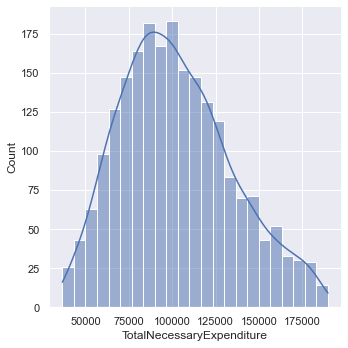

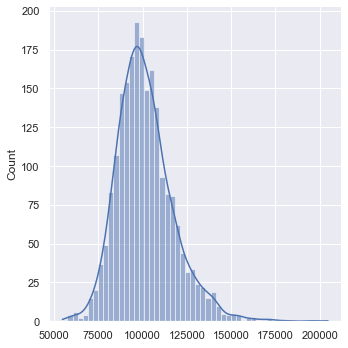

In [85]:
plt.figure(figsize=(12, 10))
ax1 = sns.displot(y_test1, kde=True)
sns.displot(predictions1, kde=True, ax=ax1)
# plt.title('Actual vs Fitted Values for Necessary Expenses')
# plt.xlabel('Expenses')
# plt.ylabel('Proportion of Households')
plt.show()

(50000.0, 160000.0)

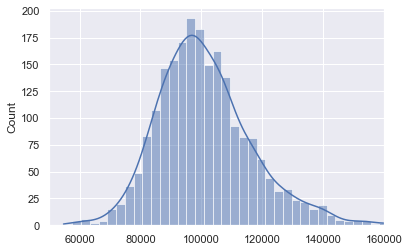

In [98]:
sns.histplot(predictions1, kde=True)
plt.xlim(50000, 160000)

C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


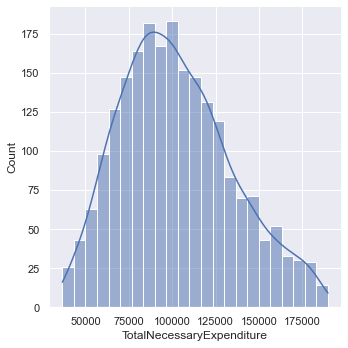

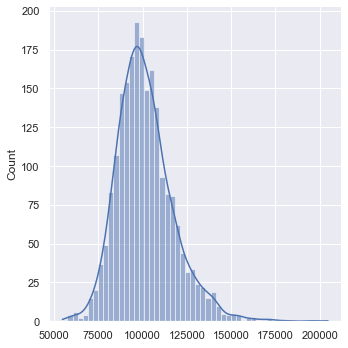

In [80]:
ax2 = sns.displot(y_test1, kde=True)
sns.displot(predictions1, kde=True, ax=ax2)

Distribution of Taxes

C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\rames\anaconda3\envs\nus\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


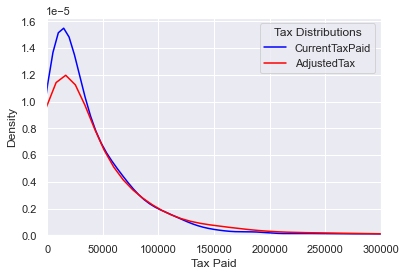

In [42]:
ax=sns.distplot(results[['CurrentTaxPaid']], hist=False, axlabel='Tax Paid', color='blue')
ax=sns.distplot(results[['AdjustedTax']], hist=False, color='red')
ax.set(xlim=(-1000, 300000))
ax.legend(title='Tax Distributions', labels=['CurrentTaxPaid', 'AdjustedTax'])